# *Exercises*

1. The director of marketing with many years of experience tells you he believes very strongly that the variant without images (B) won't perform any differently than the original variant. How could you account for this in our model? Implement this change and see how your final conclussion changes.

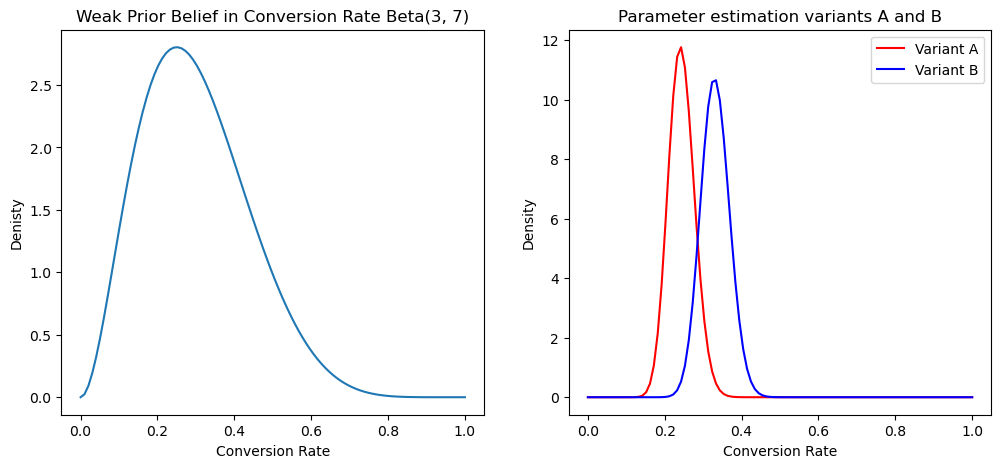

In 96.3% of the 1000 trials, varian B is better than Variant A.


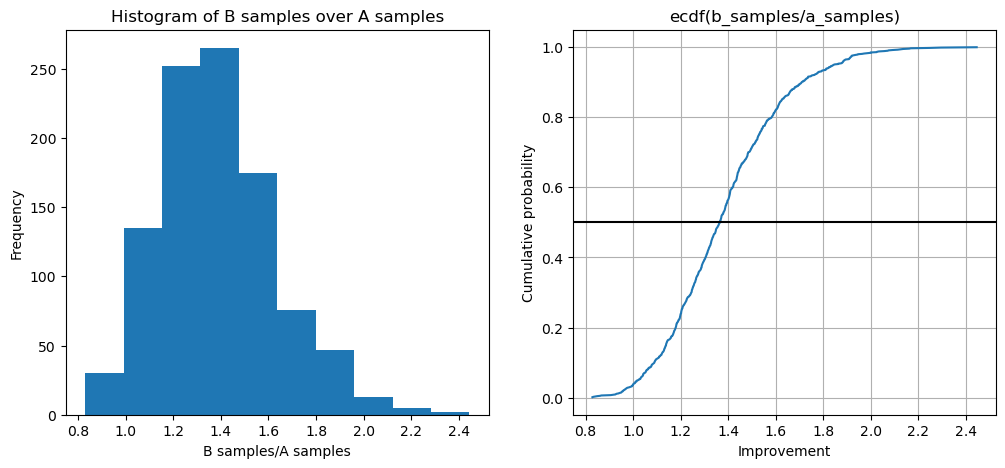

There is 25% chance that Variant B is 50% better than Variant A. 
The chance that B is 20% worse than A is the same that it is 100% better.


In [20]:
import numpy as np
from scipy.stats import beta, ecdf
import matplotlib.pyplot as plt

# Base model
alpha_ = 3
beta_ = 7

x = np.linspace(0, 1, 100)
y = beta.pdf(x, alpha_, beta_)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))


ax1.plot(x, y)
ax1.set_title('Weak Prior Belief in Conversion Rate Beta(3, 7)')
ax1.set_xlabel('Conversion Rate')
ax1.set_ylabel('Denisty')


# Obersved data to create likelihood and update posterior
variant_a = {'alpha_': 36, 'beta_': 114}
variant_b = {'alpha_': 50, 'beta_': 100}

y_a = beta.pdf(x, alpha_+variant_a['alpha_'], beta_+variant_a['beta_'])
y_b = beta.pdf(x, alpha_+variant_b['alpha_'], beta_+variant_b['beta_'])

ax2.plot(x, y_a, label='Variant A', color='red')
ax2.plot(x, y_b, label='Variant B', color='blue')
ax2.legend()
ax2.set_title('Parameter estimation variants A and B')
ax2.set_xlabel('Conversion Rate')
ax2.set_ylabel('Density')
plt.show()

# Monte Carlo
a_samples = beta.rvs(alpha_+variant_a['alpha_'], beta_+variant_a['beta_'], size=1000)
b_samples = beta.rvs(alpha_+variant_b['alpha_'], beta_+variant_b['beta_'], size=1000)

a_b = sum(b_samples > a_samples)/1000
print(f'In {(a_b)*100}% of the 1000 trials, varian B is better than Variant A.')


fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
ax1.hist(b_samples/a_samples, label='Histogram of B samples over A samples')
ax1.set_xlabel('B samples/A samples')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram of B samples over A samples')
ecdf_result = ecdf(b_samples/a_samples)
x = ecdf_result.cdf.quantiles
y = ecdf_result.cdf.probabilities
ax2.plot(x, y)
ax2.set_title('ecdf(b_samples/a_samples)')
ax2.set_xlabel('Improvement')
ax2.set_ylabel('Cumulative probability')
ax2.grid()
ax2.axhline(0.5, color='black')
plt.show()
print(f'There is 25% chance that Variant B is 50% better than Variant A. \nThe chance that B is 20% worse than A is the same that it is 100% better.')